#**Weather Forecasting**
The dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The 4 parameters here are:

1. meantemp
2. humidity
3. wind_speed
4. meanpressure

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning 40 Projects/02 Weather Forecasting/DailyDelhiClimateTrain.csv")

In [4]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [6]:
data.shape

(1462, 5)

In [7]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [8]:
data.info

<bound method DataFrame.info of             date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [10]:
figure = px.line(data, x = "date",
                 y = "meantemp",
                 title = 'Mean Temperature in Delhi Over the Years')
figure.show()

In [11]:
figure = px.line(data, x = "date",
                 y = "humidity",
                 title = 'Humidity in Delhi Over the Years')
figure.show()

In [12]:
figure = px.line(data, x = "date",
                 y = "wind_speed",
                 title = 'Humidity in Delhi Over the Years')
figure.show()

In [13]:
figure = px.scatter(data_frame = data, x = "humidity",
                    y = "meantemp", size = "meantemp",
                    trendline = "ols",
                    title = "Relationship Between Temperature and Humidity")
figure.show()

# Analyzing Temperature Change

In [14]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month

In [15]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


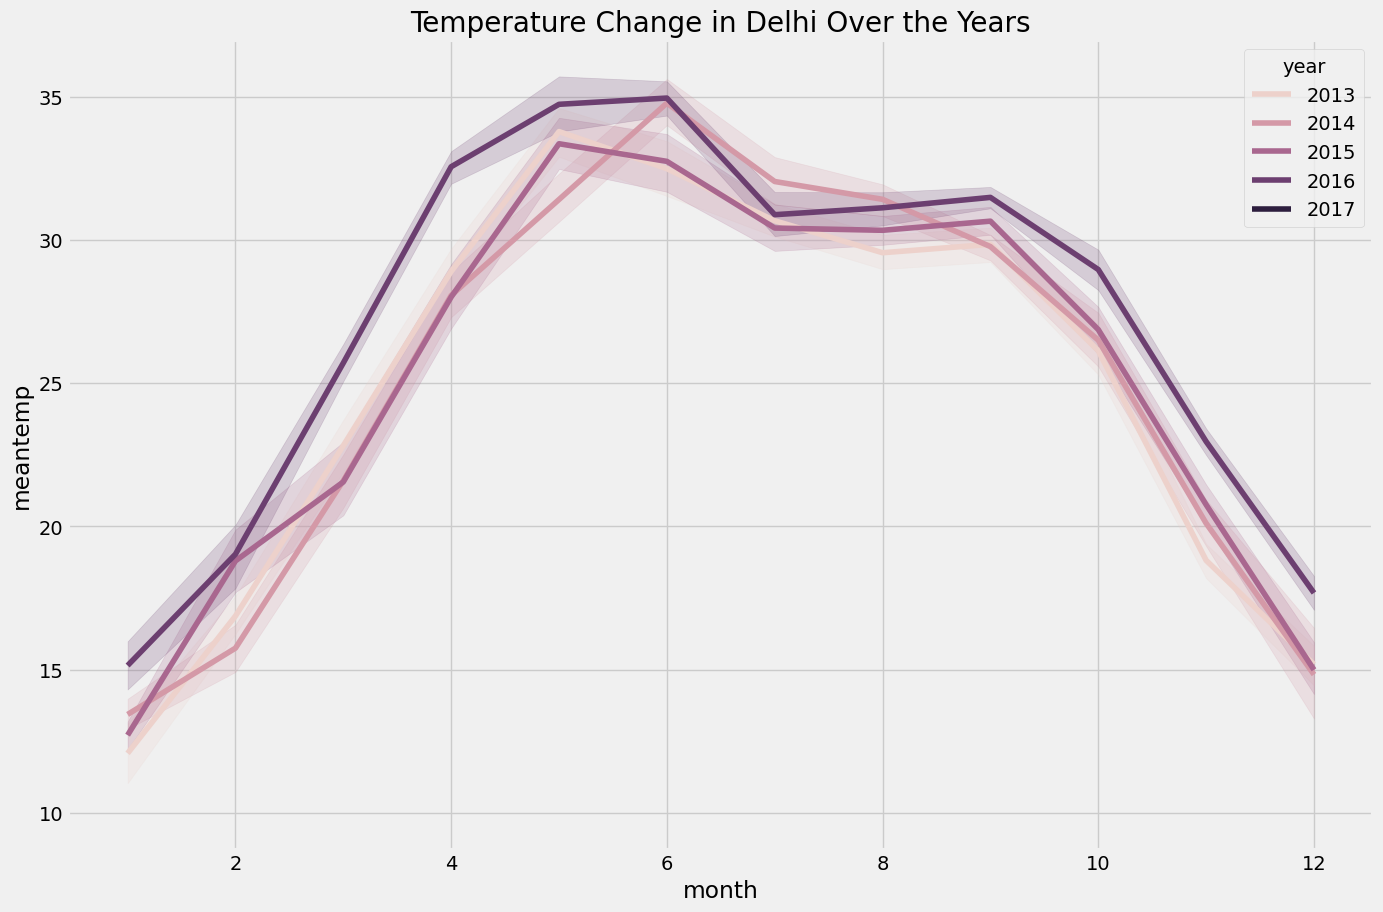

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x = 'month', y = 'meantemp', hue = 'year')
plt.show()

In [17]:
forecast_data = data.rename(columns = {"date" : "ds",
                                       "meantemp" : "y"})

In [18]:
forecast_data

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12


In [19]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [20]:
model = Prophet()
model.fit(forecast_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy_l3k9qx/eive8eg2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy_l3k9qx/3q7dbf3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71049', 'data', 'file=/tmp/tmpy_l3k9qx/eive8eg2.json', 'init=/tmp/tmpy_l3k9qx/3q7dbf3l.json', 'output', 'file=/tmp/tmpy_l3k9qx/prophet_modeljdo3i6rg/prophet_model-20240107083857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:38:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:38:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
forecasts = model.make_future_dataframe(periods = 365)
predictions = model.predict(forecasts)

In [22]:
plot_plotly(model, predictions)

#**Summary**
Weather forecasting is the task of forecasting weather conditions for a given location and time. With the use of weather data and algorithms, it is possible to predict weather conditions for the next n number of days.